# Dataset

https://data.torontopolice.on.ca/datasets/TorontoPS::ksi/about

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook

In [64]:
df = pd.read_csv('KSI.csv')

In [66]:
columns_to_keep = ['YEAR','DATE','TIME','STREET1','STREET2','LATITUDE','LONGITUDE','ACCLASS','INVTYPE','INVAGE','INJURY']

columns_to_drop = [col for col in df.columns if col not in columns_to_keep]

df = df.drop(columns=columns_to_drop, axis=1)

In [67]:
# df['STREET'] = df['STREET1'] + ' and ' + df['STREET2']
df['STREET'] = df['STREET1'] + df['STREET2'].apply(lambda x: f' and {x}' if pd.notna(x) else '')
df.drop(['STREET1', 'STREET2'], axis=1, inplace=True)

In [68]:
# Convert 'Date' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

df['MONTH'] = df['DATE'].dt.month

In [69]:
df['TIME'] = df['TIME'].astype(str).str.zfill(4)
# Convert 'TIME' column to datetime with error handling
df['TIME'] = pd.to_datetime(df['TIME'], format='%H%M', errors='coerce')

# Drop rows with invalid or missing datetime values
df = df.dropna(subset=['TIME'])

# Define the bins and labels for the time intervals
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]
labels = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-00']

# Apply the categorization
df['TIME_INTERVAL'] = pd.cut(df['TIME'].dt.hour * 100 + df['TIME'].dt.minute, bins=bins, labels=labels, right=False)

df.drop(columns=['TIME'], inplace=True)

In [71]:
df.columns

Index(['YEAR', 'DATE', 'LATITUDE', 'LONGITUDE', 'ACCLASS', 'INVTYPE', 'INVAGE',
       'INJURY', 'STREET', 'MONTH', 'TIME_INTERVAL'],
      dtype='object')

In [72]:
new_column_order = ['YEAR','MONTH', 'DATE', 'TIME_INTERVAL', 'STREET', 'LATITUDE', 'LONGITUDE', 'ACCLASS', 'INVTYPE', 'INVAGE', 'INJURY']
df = df[new_column_order]

In [73]:
# Assuming you have a DataFrame named 'df'
# df.to_csv('KSI_Update.csv', index=False)

## Total Collision by Year

In [79]:
pd.Series(dict(sorted(df.YEAR.value_counts().to_dict().items())))

2006    1483
2007    1474
2008    1239
2009    1242
2010    1190
2011    1179
2012    1348
2013    1232
2014     916
2015     929
2016    1006
2017     980
2018    1074
2019     940
2020     640
2021     621
2022     701
dtype: int64

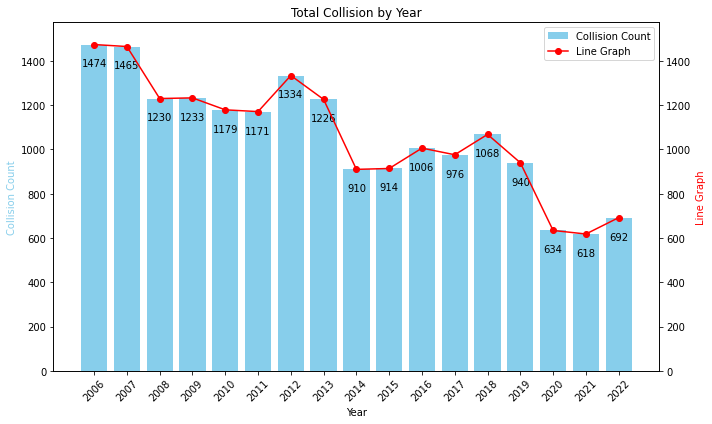

In [10]:
sorted_data = pd.Series(dict(sorted(df.YEAR.value_counts().to_dict().items())))

# Creating figure and axes objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating bar graph
bars = ax1.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', label='Collision Count')

# Adding text labels to the bars
for i, v in enumerate(sorted_data):
    ax1.text(i, v - 100, str(v), color='black', ha='center')

# Creating a line graph
ax2 = ax1.twinx()
line = ax2.plot(range(len(sorted_data)), sorted_data.values, marker='o', linestyle='-', color='red', label='Line Graph')

# Synchronize Y-axis limits for both graphs
max_value = max(max(sorted_data.values), max(sorted_data.values))
ax1.set_ylim(0, max_value+100)
ax2.set_ylim(0, max_value+100)

# Setting x-axis ticks and labels
ax1.set_xticks(range(len(sorted_data)))
ax1.set_xticklabels(sorted_data.index, rotation=45)

# Combining legends from both graphs
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Setting labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Collision Count', color='skyblue')
ax2.set_ylabel('Line Graph', color='red')
ax1.set_title('Total Collision by Year')

plt.tight_layout()
plt.show()

## Total Collision by Month

In [78]:
df.MONTH.value_counts().sort_index()

MONTH
1     1281
2     1107
3     1246
4     1260
5     1547
6     1771
7     1698
8     1876
9     1772
10    1742
11    1528
12    1366
Name: count, dtype: int64

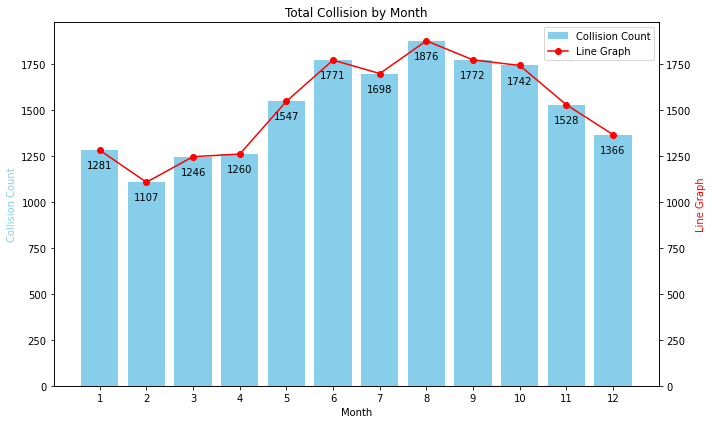

In [74]:
sorted_data = df.MONTH.value_counts().sort_index()

# Creating figure and axes objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating bar graph
bars = ax1.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', label='Collision Count')

# Adding text labels to the bars
for i, v in enumerate(sorted_data):
    ax1.text(i, v - 100, str(v), color='black', ha='center')

# Creating a line graph
ax2 = ax1.twinx()
line = ax2.plot(range(len(sorted_data)), sorted_data.values, marker='o', linestyle='-', color='red', label='Line Graph')

# Synchronize Y-axis limits for both graphs
max_value = max(max(sorted_data.values), max(sorted_data.values))
ax1.set_ylim(0, max_value+100)
ax2.set_ylim(0, max_value+100)

# Setting x-axis ticks and labels
ax1.set_xticks(range(len(sorted_data)))
ax1.set_xticklabels(sorted_data.index)#, rotation=45)

# Combining legends from both graphs
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Setting labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Collision Count', color='skyblue')
ax2.set_ylabel('Line Graph', color='red')
ax1.set_title('Total Collision by Month')

plt.tight_layout()
plt.show()

## Total Collision by Time

In [80]:
df.TIME_INTERVAL.value_counts().sort_index()

TIME_INTERVAL
00-01     601
01-02     429
02-03     490
03-04     446
04-05     181
05-06     304
06-07     547
07-08     569
08-09     693
09-10     732
10-11     753
11-12     789
12-13     797
13-14     893
14-15    1016
15-16    1077
16-17    1075
17-18    1177
18-19    1220
19-20    1051
20-21     994
21-22     911
22-23     797
23-00     652
Name: count, dtype: int64

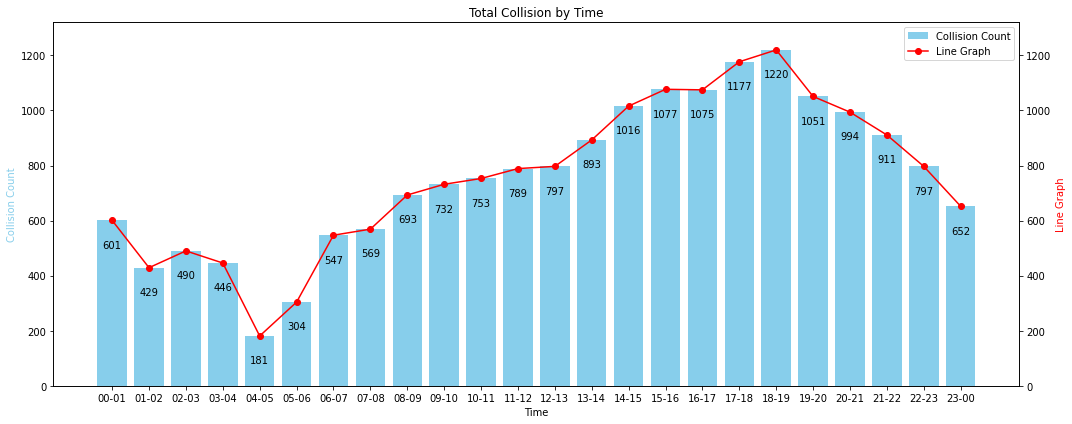

In [75]:
sorted_data = df.TIME_INTERVAL.value_counts().sort_index()

# Creating figure and axes objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Creating bar graph
bars = ax1.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', label='Collision Count')

# Adding text labels to the bars
for i, v in enumerate(sorted_data):
    ax1.text(i, v - 100, str(v), color='black', ha='center')

# Creating a line graph
ax2 = ax1.twinx()
line = ax2.plot(range(len(sorted_data)), sorted_data.values, marker='o', linestyle='-', color='red', label='Line Graph')

# Synchronize Y-axis limits for both graphs
max_value = max(max(sorted_data.values), max(sorted_data.values))
ax1.set_ylim(0, max_value+100)
ax2.set_ylim(0, max_value+100)

# Setting x-axis ticks and labels
ax1.set_xticks(range(len(sorted_data)))
ax1.set_xticklabels(sorted_data.index)#, rotation=45)

# Combining legends from both graphs
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Setting labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('Collision Count', color='skyblue')
ax2.set_ylabel('Line Graph', color='red')
ax1.set_title('Total Collision by Time')

plt.tight_layout()
plt.show()


## Top Collision Spots

In [81]:
df['STREET'].value_counts().head(5).sort_values(ascending=True)

STREET
FINCH AVE W and WESTON RD                   24
QUEENS QUAY W and LOWER SIMCOE ST           27
EGLINTON AVE W and MARTIN GROVE RD          27
DON VALLEY PARKWAY  S and LAWRENCE AVE E    29
LAKE SHORE BLVD E and LOWER JARVIS ST       30
Name: count, dtype: int64

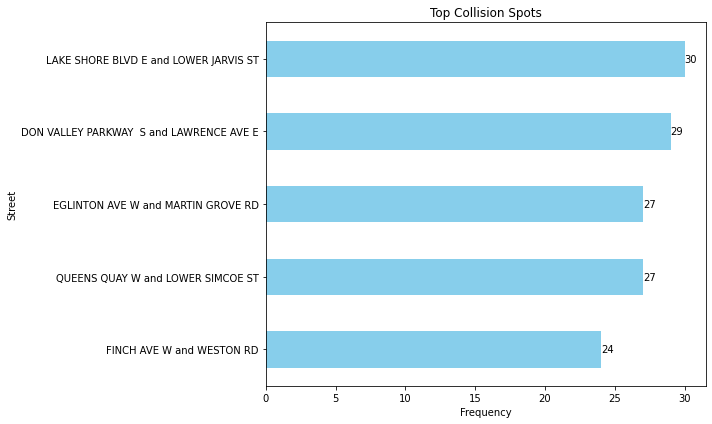

In [76]:
top_values = df['STREET'].value_counts().head(5).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = top_values.plot(kind='barh', color='skyblue')
plt.ylabel('Street')
plt.xlabel('Frequency')
plt.title('Top Collision Spots')

for i, v in enumerate(top_values):
    plt.text(v, i, str(v), color='black', va='center')

# Adjust layout and axis ticks
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

## Total Fatalities by Involvement

In [82]:
invtype_value_counts

INVTYPE
Driver        1246
Pedestrian     566
Passenger      383
Other          326
Cyclist         44
Name: count, dtype: int64

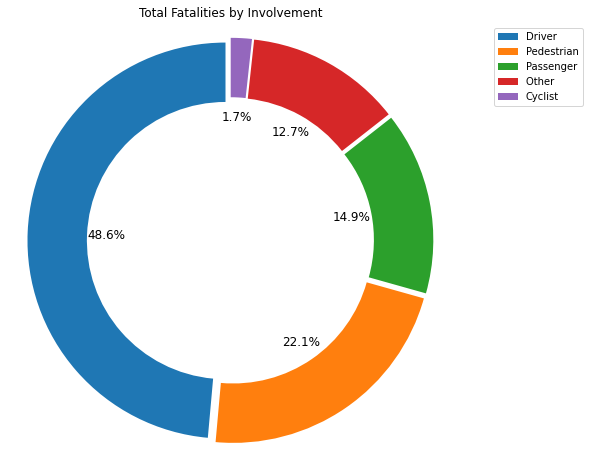

In [77]:
invtype_value_counts = df[df['ACCLASS'] == 'Fatal']['INVTYPE'].value_counts()
values_to_group = ['Vehicle Owner', 'Other', 'Other Property Owner', 'Wheelchair', 
                   'Motorcycle Passenger', 'Driver - Not Hit', 'Witness', 'Moped Driver']

others_total = invtype_value_counts[values_to_group].sum()
invtype_value_counts['Other '] = others_total  
invtype_value_counts = invtype_value_counts.drop(values_to_group)

values_to_group = ['Truck Driver','Motorcycle Driver','Driver']

others_total = invtype_value_counts[values_to_group].sum()
invtype_value_counts['Driver '] = others_total  
invtype_value_counts = invtype_value_counts.drop(values_to_group).sort_values(ascending=False)

plt.figure(figsize=(8, 8))


# Choose a color palette and plot the donut chart
colors = plt.cm.tab10.colors  # You can choose other colormaps
explode = (0.025, 0.025, 0.025, 0.025, 0.025)  # Explode the first segment
wedgeprops = {'width': .3}  # Adjust the width of the donut

plt.pie(invtype_value_counts, autopct='%1.1f%%', startangle=90, colors=colors, 
        explode=explode, wedgeprops=wedgeprops, textprops={'fontsize': 12})

# colors = plt.cm.tab10.colors
# plt.pie(invtype_value_counts, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

plt.title('Total Fatalities by Involvement')
plt.axis('equal')
plt.legend(labels=invtype_value_counts.index, loc='upper right',bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()